# **Customer Segmentation**

- **Objective**: Identify customer segments based on satisfaction and sentiment for targeted marketing or product improvement.

## **Table Of Content**

- Data Preparation
   - Load the Dataset
   - Missing & Dublicate Values
- EDA:
   - Sentiment Analysis
         - [Pie chart (Sentiment Distribution)]
         - [Boxplot (Rating by Sentiment)]
         - [Stacked bar chart (Sentiment vs. Rating)]
   - Histogram (Review Length Distribution)
   - Text Analysis
   - Correlation Analysis
- Feature Engineering
   - Top Bigrams in Customer Reviews
- Model Building/ Evaluation
   - Logistic Regression
   - XGBoost Classifier
   - Random Forest Classifier
   - Naive Bayes
   -  SVM (Support Vector Machine)
   -  KNN (K-Nearest Neighbors)
- Deployment

## **Data Preparation**

#### **Installing Required Libraries**
As a first step, we install necessary Python libraries for data analysis, natural language processing (NLP), and visualization. These include `nltk` for text processing, `textblob` for sentiment analysis, and `wordcloud` for visualizing word frequencies.

In [1]:
!pip install nltk
!pip install textblob

In [2]:
!pip install WordCloud

### **Importing Libraries**
We import libraries for data manipulation (`pandas`, `numpy`), visualization (`matplotlib`, `seaborn`, `wordcloud`), and NLP (`nltk`). Warnings are suppressed to keep the output clean.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')

# Download NLTK data (run once)
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\artik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\artik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## **Load the Dataset**

In [4]:
df=pd.read_csv("Dataset.csv")

In [5]:
df

title  rating  \
0                            Horrible product       1   
1     Camera quality is not like 48 megapixel       3   
2                                     Overall       4   
3                            A big no from me       1   
4               Put your money somewhere else       1   
...                                       ...     ...   
1435                         Excellent mobile       5   
1436              Never expected from samsung       1   
1437                     Good value for money       5   
1438               Unreal and whitish display       1   
1439                       Beast of the best.       5   

                                                   body  
0     Very disappointed with the overall performance...  
1                                 Camera quality is low  
2     Got the mobile on the launch date,Battery must...  
3     1. It doesn't work with 5.0GHz WiFi frequency....  
4     Not worth buying....faulty software, poor disp...  
...                                                 ...  
1435                                   Excellent mobile  
1436  All over mobile performance is very poor, neve...  
1437  Battery life is good but camera clarity could ...  
1438  It's a very bad product, highly dissatisfied.....  
1439  The phone is a real beast the battery lasts ea...  

[1440 rows x 3 columns]

We load the "Dataset.csv" file containing customer reviews. This dataset includes 1440 rows with `title`, `rating`, and `body` columns, where `rating` is a numerical score (1-5) and `body` contains the review text.

### **Dataset Overview**
We explore the dataset's structure, including the number of rows and columns, data types, and a summary of the data to understand its distribution.

- **Shape**: Check the number of rows and columns.
- **Info**: Display data types and non-null counts.
- **Statistics**: Provide descriptive statistics for numerical columns.

In [6]:
# Show dataset info
print(df.head())

                                     title  rating  \
0                         Horrible product       1   
1  Camera quality is not like 48 megapixel       3   
2                                  Overall       4   
3                         A big no from me       1   
4            Put your money somewhere else       1   

                                                body  
0  Very disappointed with the overall performance...  
1                              Camera quality is low  
2  Got the mobile on the launch date,Battery must...  
3  1. It doesn't work with 5.0GHz WiFi frequency....  
4  Not worth buying....faulty software, poor disp...  


In [7]:
print(df.tail())

                            title  rating  \
1435             Excellent mobile       5   
1436  Never expected from samsung       1   
1437         Good value for money       5   
1438   Unreal and whitish display       1   
1439           Beast of the best.       5   

                                                   body  
1435                                   Excellent mobile  
1436  All over mobile performance is very poor, neve...  
1437  Battery life is good but camera clarity could ...  
1438  It's a very bad product, highly dissatisfied.....  
1439  The phone is a real beast the battery lasts ea...  


In [8]:
df.shape

(1440, 3)

In [9]:
print("\nData Types and Non-Null Counts:")
df.info()


Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   1440 non-null   object
 1   rating  1440 non-null   int64 
 2   body    1440 non-null   object
dtypes: int64(1), object(2)
memory usage: 33.9+ KB


In [10]:
#Summary stats 
print("\nDescriptive Statistics:")
display(df.describe(include='all'))


Descriptive Statistics:


title       rating  \
count              1440  1440.000000   
unique             1351          NaN   
top     Value for money          NaN   
freq                 16          NaN   
mean                NaN     3.173611   
std                 NaN     1.584453   
min                 NaN     1.000000   
25%                 NaN     1.000000   
50%                 NaN     4.000000   
75%                 NaN     5.000000   
max                 NaN     5.000000   

                                                     body  
count                                                1440  
unique                                               1440  
top     Very disappointed with the overall performance...  
freq                                                    1  
mean                                                  NaN  
std                                                   NaN  
min                                                   NaN  
25%                                                   NaN  
50%                                                   NaN  
75%                                                   NaN  
max                                                   NaN

In [11]:
df.describe()

rating
count  1440.000000
mean      3.173611
std       1.584453
min       1.000000
25%       1.000000
50%       4.000000
75%       5.000000
max       5.000000

## **Missing & Duplicate Values**

#### **Handling Missing Values**
The dataset is inspected for missing values. Since the initial check shows no nulls, we proceed without dropping data.
#### **Handling Duplicates**
We check for and remove duplicate entries to ensure data integrity.

In [12]:
# Check for nulls
print(df.isnull().sum())

title     0
rating    0
body      0
dtype: int64


In [13]:
# Check for duplicates
print("Duplicates:", df.duplicated().sum())

Duplicates: 0


## **EDA**

### **Sentiment Analysis**

To predict the Sentiment as positive(numerical value = 1) or negative(numerical value = 0), we need to change them the values to those categories.

### **2.1. Sentiment Distribution**


- We use to classify reviews as Positive, Negative, or Neutral.

In [16]:
# Create sentiment column first (if not already there)
from textblob import TextBlob

# Calculate polarity
df['sentiment'] = df['body'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Classify sentiment
def classify_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['sentiment'].apply(classify_sentiment)

# ✅ Now count sentiment categories
sentiment_counts = df['sentiment_category'].value_counts()


**Let's check out that how many counts are there for positive and negative sentiments.**

In [17]:
print("Sentiment Counts:")
print(sentiment_counts)

Sentiment Counts:
sentiment_category
Positive    873
Neutral     329
Negative    238
Name: count, dtype: int64


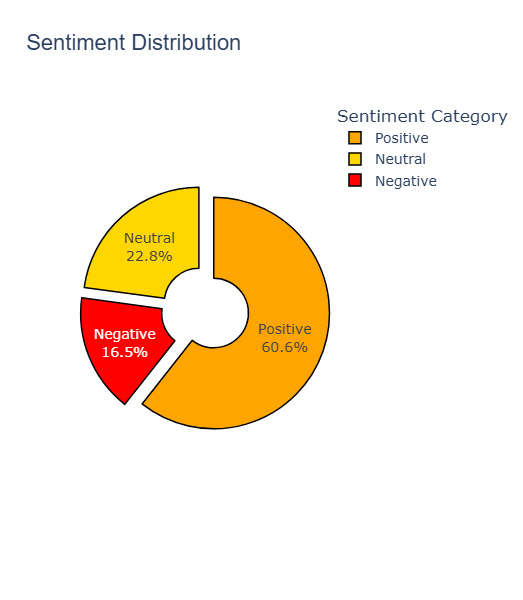

In [18]:
import plotly.express as px

# Count sentiment categories
sentiment_counts = df['sentiment_category'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']

# Create Pie Chart
fig = px.pie(
    sentiment_counts,
    names='Sentiment',
    values='Count',
    color='Sentiment',
    title="Sentiment Distribution",
    color_discrete_map={'Positive': 'orange', 'Negative': 'red', 'Neutral': 'gold'},
    hole=0.3  # Optional: donut style
)

# Enhance label visibility and layout
fig.update_traces(
    textinfo='percent+label',
    textfont_size=14,
    pull=[0.08, 0.08, 0.08],
    marker=dict(line=dict(color='black', width=1.5))  # Black border for contrast
)

# Layout formatting
fig.update_layout(
    title_font_size=22,
    title_font_family="Arial",
    width=850,
    height=600,
    legend_title='Sentiment Category',
    legend=dict(font=dict(size=14)),
    template='plotly_white'
)

# Show the chart
fig.show()


### **Output**

This pie chart shows how customer reviews are distributed across sentiment categories:

- **Positive**: 60.6%
- **Neutral**: 16.5%
- **Negative**: 22.8%

This helps businesses understand overall customer satisfaction and focus areas.

**This pie chart gives a clear picture of how customers feel. It helps teams understand what’s working well and what needs to improve, so better decisions can be made using real data.**


### **2.2 Rating by Sentiment**

Shows how ratings (1–5 stars) are distributed for each sentiment type.

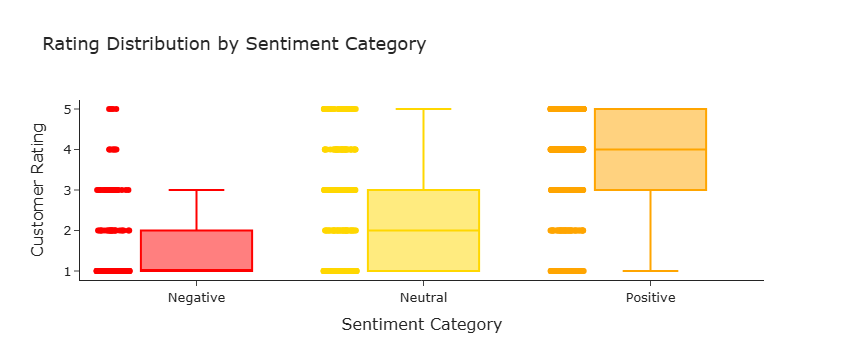

In [19]:
# Create boxplot
fig = px.box(
    df,
    x='sentiment_category',
    y='rating',
    color='sentiment_category',
    points='all',  # shows all data points like stripplot
    color_discrete_map={'Positive': 'orange', 'Negative': 'red', 'Neutral': 'gold'},
    title='Rating Distribution by Sentiment Category'
)

# Update layout
fig.update_layout(
    title_font_size=18,
    xaxis_title='Sentiment Category',
    yaxis_title='Customer Rating',
    font=dict(size=13),
    template='simple_white',
    showlegend=False
)

fig.show()


### **Interpretation:**

Each bar represents the number of reviews for a particular rating value (e.g., 1 to 5).

The x-axis shows rating values:
Typically 1 = worst, 5 = best.

The y-axis shows the count (frequency) of how many customers gave that rating.

Bar height = number of reviews with that rating.

**This chart shows a strong match between how customers feel in their text and the star ratings they give. It confirms that our sentiment analysis is reliable, because people who say good things also give high ratings — and those who complain give low ratings.**

### **2.3. Sentiment per Rating**

Shows how many positive/negative reviews exist for each star rating (1 to 5).


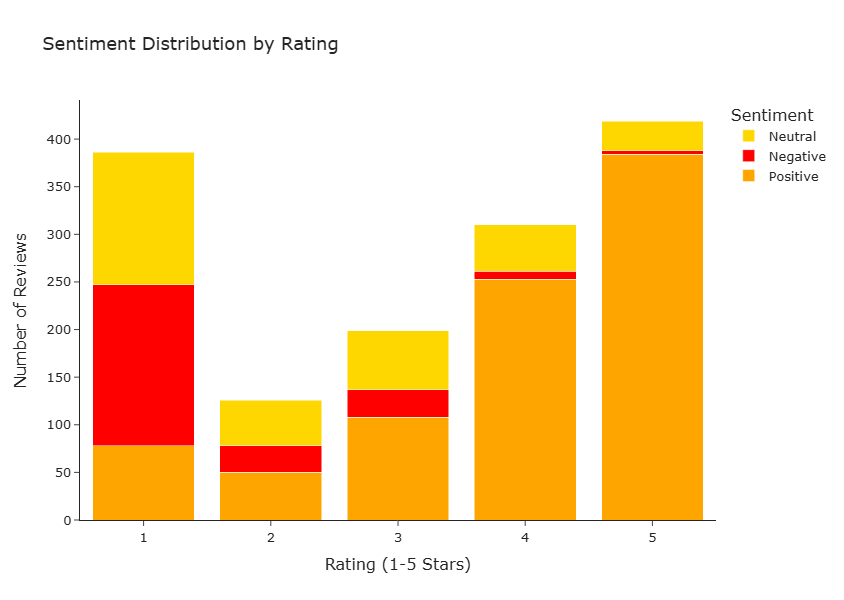

In [20]:
import plotly.graph_objects as go
import pandas as pd

# Create crosstab
sentiment_crosstab = pd.crosstab(df['rating'], df['sentiment_category'])

# Ensure all sentiment categories are in the same order
sentiment_crosstab = sentiment_crosstab[['Positive', 'Negative', 'Neutral']]

# Create bar chart
fig = go.Figure()

# Add traces for each sentiment category
fig.add_trace(go.Bar(
    x=sentiment_crosstab.index,
    y=sentiment_crosstab['Positive'],
    name='Positive',
    marker_color='orange'
))
fig.add_trace(go.Bar(
    x=sentiment_crosstab.index,
    y=sentiment_crosstab['Negative'],
    name='Negative',
    marker_color='red'
))
fig.add_trace(go.Bar(
    x=sentiment_crosstab.index,
    y=sentiment_crosstab['Neutral'],
    name='Neutral',
    marker_color='gold'
))

# Customize layout
fig.update_layout(
    barmode='stack',
    title='Sentiment Distribution by Rating',
    xaxis_title='Rating (1-5 Stars)',
    yaxis_title='Number of Reviews',
    width=900,
    height=600,
    legend_title='Sentiment',
    template='simple_white',
    font=dict(size=13)
)

# Show interactive chart
fig.show()


#### **Interpretation**

This chart helps us see if customers' written reviews match the star ratings they gave. It shows whether their words and ratings tell the same story, which is important for checking review quality.

### **2.4 Review Length Analysis**

This is a combination of:

   - Histogram → Shows how many reviews fall into each length range

   - KDE Curve (Smoothed Line) → Shows the overall shape of the distribution

   - Vertical Lines → Highlight the mean and median review lengths



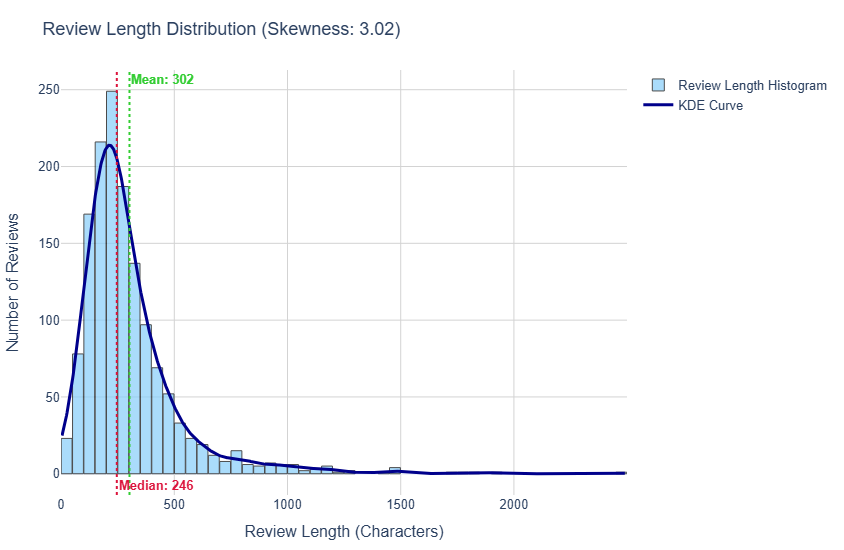

In [21]:
import plotly.graph_objects as go
import numpy as np
from scipy.stats import gaussian_kde, skew

# --- Data Prep ---
df['review_length'] = df['body'].apply(len)
x = df['review_length']
kde = gaussian_kde(x)
x_range = np.linspace(x.min(), x.max(), 1000)
kde_scaled = kde(x_range) * len(x) * (x.max() - x.min()) / 50

mean_val = int(x.mean())
median_val = int(x.median())
skew_val = round(skew(x), 2)

# --- Plot Setup ---
fig = go.Figure()

# Histogram
fig.add_trace(go.Histogram(
    x=x,
    nbinsx=50,
    name='Review Length Histogram',
    marker=dict(color='lightskyblue', line=dict(color='black', width=1)),
    opacity=0.7
))

# KDE Curve
fig.add_trace(go.Scatter(
    x=x_range,
    y=kde_scaled,
    mode='lines',
    name='KDE Curve',
    line=dict(color='darkblue', width=3)
))

# Mean Line
fig.add_vline(
    x=mean_val,
    line=dict(color='limegreen', width=2, dash='dot'),
    annotation_text=f"<b>Mean: {mean_val}</b>",
    annotation_position="top right",
    annotation_font_color="limegreen"
)

# Median Line
fig.add_vline(
    x=median_val,
    line=dict(color='crimson', width=2, dash='dot'),
    annotation_text=f"<b>Median: {median_val}</b>",
    annotation_position="bottom right",
    annotation_font_color="crimson"
)

# Layout
fig.update_layout(
    title=f"Review Length Distribution (Skewness: {skew_val})",
    xaxis_title="Review Length (Characters)",
    yaxis_title="Number of Reviews",
    width=950,
    height=550,
    template="plotly_white",
    bargap=0.04,
    legend=dict(font=dict(size=13)),
    font=dict(family="Arial", size=13),
    margin=dict(l=40, r=40, t=70, b=40),
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridcolor='lightgray')
)

fig.show()


#### **Interpretation:**

The review length distribution has a high positive skewness of 3.2, indicating that while most reviews are concise, a small number of extremely long reviews significantly increase the average.
This suggests that while most customers write moderately short reviews, a few very long reviews are increasing the average.

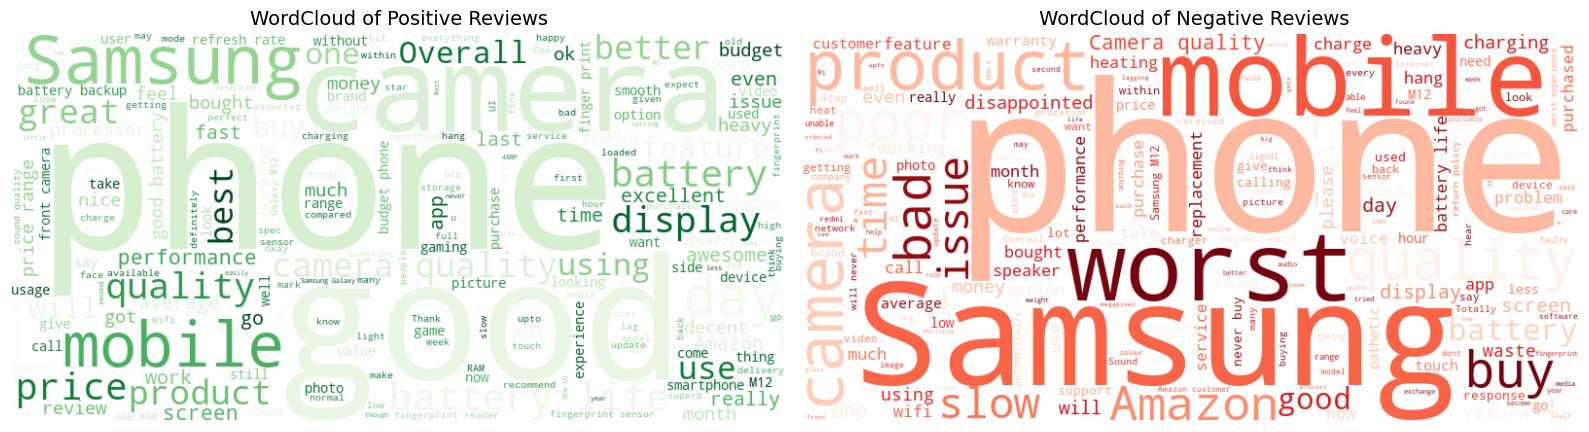

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a DataFrame for binary sentiment classification
df_binary_sentiment = df[df['sentiment_category'] != 'Neutral'].copy()

# Map sentiment categories to binary labels (Positive = 1, Negative = 0)
df_binary_sentiment['sentiment_label'] = df_binary_sentiment['sentiment_category'].map({
    'Positive': 1,
    'Negative': 0
})


# Split positive and negative reviews
positive_reviews = df_binary_sentiment[df_binary_sentiment['sentiment_label'] == 1]
negative_reviews = df_binary_sentiment[df_binary_sentiment['sentiment_label'] == 0]

# Combine text
positive_text = " ".join(positive_reviews['body'].astype(str))
negative_text = " ".join(negative_reviews['body'].astype(str))

# Create figure with subplots
plt.figure(figsize=(16, 7))

# WordCloud for Positive Reviews
plt.subplot(1, 2, 1)
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Positive Reviews", fontsize=14)

# WordCloud for Negative Reviews
plt.subplot(1, 2, 2)
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title(" WordCloud of Negative Reviews", fontsize=14)

plt.tight_layout()
plt.show()


### **Interpretation:**

The word clouds clearly show what customers commonly mention in positive and negative reviews.

- In positive reviews, customers often use words like **"great," "love," "easy," and "excellent.**"
This suggests they are happy with the product’s quality, ease of use, and overall experience.

- In negative reviews, words like **"poor," "bad," "disappointed," and "slow"** appear frequently.
This indicates dissatisfaction related to product performance, delivery, or customer service.

**"Overall, these word clouds help us quickly understand what customers like and dislike, allowing businesses to focus on improving negative points while continuing to highlight their strengths."**



### **2.6. Correlation Analysis**

We calculate the Pearson correlation coefficient between numerical features (rating, sentiment_score, review_length, word_count) to understand their relationships. A heatmap visualization is used to display the correlation matrix, where values close to 1 or -1 indicate strong positive or negative correlations, respectively, and values near 0 indicate weak correlations.

- **Purpose**: Identify how ratings, sentiment scores, and review characteristics are related, which can guide feature selection for clustering.


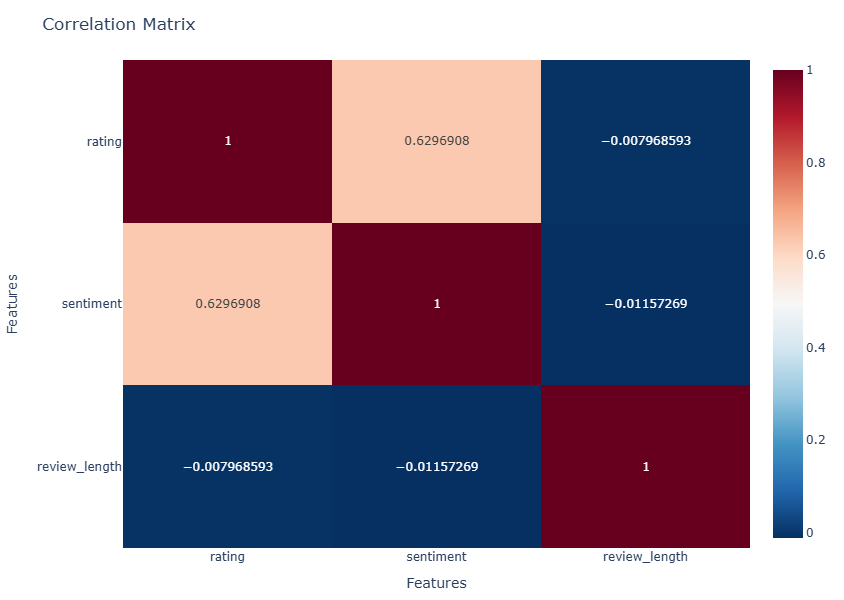

In [25]:
import plotly.express as px

# Create a DataFrame with only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr = numeric_df.corr().round(2).reset_index().melt(id_vars='index')
corr.columns = ['Feature1', 'Feature2', 'Correlation']

# Plotly heatmap
fig = px.imshow(
    numeric_df.corr(),
    text_auto=True,
    color_continuous_scale='RdBu_r',
    aspect='auto',
    title='Correlation Matrix'
)

# Update layout for better visuals
fig.update_layout(
    width=700,
    height=600,
    font=dict(size=12),
    margin=dict(l=40, r=40, t=60, b=40),
    xaxis_title="Features",
    yaxis_title="Features"
)

fig.show()


### **Interpretation:**

Based on the correlation matrix:

- I’ll avoid multicollinearity by choosing either word_count or review_length, not both.

- sentiment_score is a good predictor of customer rating — it should be prioritized.

- rating and length are not strongly connected — that tells me short reviews can still express clear sentiment (important for NLP modeling).

- I may standardize or transform heavily skewed features before using them in ML models.

**“Our analysis shows that the sentiment score aligns closely with customer ratings, confirming that sentiment analysis can help predict satisfaction. However, review length doesn’t influence star ratings much, so length alone isn’t a good quality indicator. Also, some features are highly correlated, which we should manage to avoid redundancy in predictive models.”**

## **Feature Engineering**

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from textblob import TextBlob

# Calculate sentiment polarity for each review
df['sentiment_score'] = df['body'].apply(lambda x: TextBlob(x).sentiment.polarity)


# Select features for clustering
features = ['rating', 'sentiment_score']
X = df[features].copy()

# Handle any potential missing values (though previously checked)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

print("Preprocessed Data Shape:", X_scaled.shape)
print("\nFirst 5 Rows of Scaled Data:\n", X_scaled[:5])

Preprocessed Data Shape: (1440, 2)

First 5 Rows of Scaled Data:
 [[-1.37231345 -2.14716589]
 [-0.1096097  -0.53413052]
 [ 0.52174217 -0.45141076]
 [-1.37231345 -0.5526798 ]
 [-1.37231345 -0.43565461]]


In [29]:
from textblob import TextBlob

# 1. Review Length (number of words)
df['review_length'] = df['body'].apply(lambda x: len(str(x).split()))

# 2. Sentiment Score (if not already done)
df['sentiment_score'] = df['body'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# 3. Rating-Sentiment Gap
df['rating_sentiment_gap'] = df['rating'] - df['sentiment_score']

# Show new features
df[['body', 'review_length', 'sentiment_score', 'rating', 'rating_sentiment_gap']].head()


body  review_length  \
0  Very disappointed with the overall performance...              8   
1                              Camera quality is low              4   
2  Got the mobile on the launch date,Battery must...             66   
3  1. It doesn't work with 5.0GHz WiFi frequency....             67   
4  Not worth buying....faulty software, poor disp...             29   

   sentiment_score  rating  rating_sentiment_gap  
0        -0.487500       1              1.487500  
1         0.000000       3              3.000000  
2         0.025000       4              3.975000  
3        -0.005606       1              1.005606  
4         0.029762       1              0.970238

### **Top Bigrams in Customer Reviews**

We use bigrams in text analysis to:

- Find common phrases in customer reviews

- Understand how people express opinions (e.g., “not good”, “very satisfied”)

- Improve the quality of text-based models (like sentiment analysi

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import plotly.graph_objects as go

# Ensure sentiment labels exist
if 'sentiment_label' not in df.columns:
    from textblob import TextBlob
    df["sentiment"] = df["body"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
    def classify_sentiment(score):
        if score > 0.1:
            return 'Positive'
        elif score < -0.1:
            return 'Negative'
        else:
            return 'Neutral'
    df["sentiment_label"] = df["sentiment"].apply(classify_sentiment)

# Separate positive and negative reviews
positive_reviews = df[df['sentiment_label'] == 'Positive']['body'].dropna().astype(str)
negative_reviews = df[df['sentiment_label'] == 'Negative']['body'].dropna().astype(str)

# Function to get top n-grams
def get_top_ngrams(text_series, ngram_range=(1, 1), top_n=10):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    ngrams = vectorizer.fit_transform(text_series)
    sum_words = ngrams.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    return sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_n]


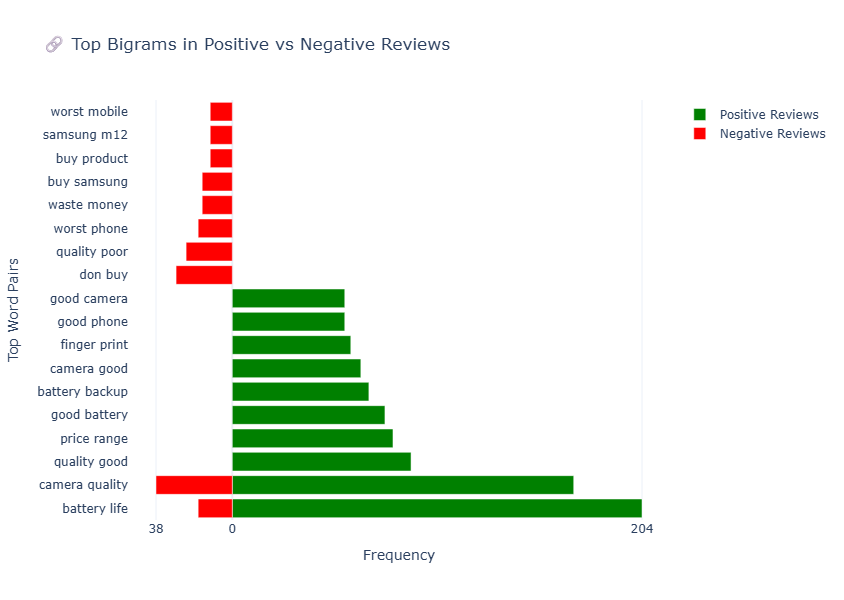

In [31]:
# Step 1: Get Top Bigrams for Positive and Negative Reviews
top_pos_bigrams = get_top_ngrams(positive_reviews, ngram_range=(2, 2))
top_neg_bigrams = get_top_ngrams(negative_reviews, ngram_range=(2, 2))

# Step 2: Convert to DataFrames
df_pos_bi = pd.DataFrame(top_pos_bigrams, columns=['Bigram', 'Frequency'])
df_neg_bi = pd.DataFrame(top_neg_bigrams, columns=['Bigram', 'Frequency'])

# Step 3: Plot side-by-side bigrams
fig_bi = go.Figure()

fig_bi.add_trace(go.Bar(
    x=df_pos_bi['Frequency'],
    y=df_pos_bi['Bigram'],
    name='Positive Reviews',
    orientation='h',
    marker_color='green'
))

fig_bi.add_trace(go.Bar(
    x=-df_neg_bi['Frequency'],
    y=df_neg_bi['Bigram'],
    name='Negative Reviews',
    orientation='h',
    marker_color='red'
))

fig_bi.update_layout(
    title='🔗 Top Bigrams in Positive vs Negative Reviews',
    xaxis_title='Frequency',
    yaxis_title='Top Word Pairs',
    barmode='overlay',
    xaxis=dict(
        tickvals=[-max(df_neg_bi['Frequency']), 0, max(df_pos_bi['Frequency'])],
        ticktext=[str(max(df_neg_bi['Frequency'])), '0', str(max(df_pos_bi['Frequency']))]
    ),
    template='plotly_white',
    height=600
)

fig_bi.show()


#### **Interpretation**

**Positive Reviews (Green)**

The bigrams here often highlight:

- Strong product features (e.g., “battery life”, “great camera”)

- Customer satisfaction (e.g., “fast delivery”, “easy use”)

**Negative Reviews (Red)**

These bigrams typically show:

- Frustrations or issues (e.g., “poor quality”, “stopped working”)

- Complaints about service or defects (e.g., “customer support”, “charging problem”)

**"This side-by-side chart makes it easy to see what customers like and what they are unhappy about. By looking at the most common word pairs, we can quickly understand what’s making customers happy and what problems they are facing."**


## **Model Building & Evaluation**


#### **Prepare the Data**

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob  # For sentiment analysis

# Load the dataset
df = pd.read_csv("Dataset.csv")

# Define target variable: 1 if rating >= 4 (satisfied), 0 otherwise
df['satisfied'] = np.where(df['rating'] >= 4, 1, 0)

# Feature engineering
# Sentiment score using TextBlob
df['sentiment_score'] = df['body'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Review length and word count
df['review_length'] = df['body'].apply(lambda x: len(str(x)))
df['word_count'] = df['body'].apply(lambda x: len(str(x).split()))

# Select features and target
features = ['sentiment_score', 'review_length', 'word_count']
X = df[features].copy()
y = df['satisfied']

# Handle missing values (if any)
X = X.fillna(X.mean())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### **Logistic Regression**

To train a Logistic Regression model that predicts customer sentiment (Positive or Negative) using:

- TF-IDF text features

- Possibly added engineered features (like review_length, rating_sentiment_gap)

Test Set Accuracy: 0.792
Cross-Validation Scores: 0.776 (±0.013)

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.76      0.78       142
           1       0.78      0.82      0.80       146

    accuracy                           0.79       288
   macro avg       0.79      0.79      0.79       288
weighted avg       0.79      0.79      0.79       288



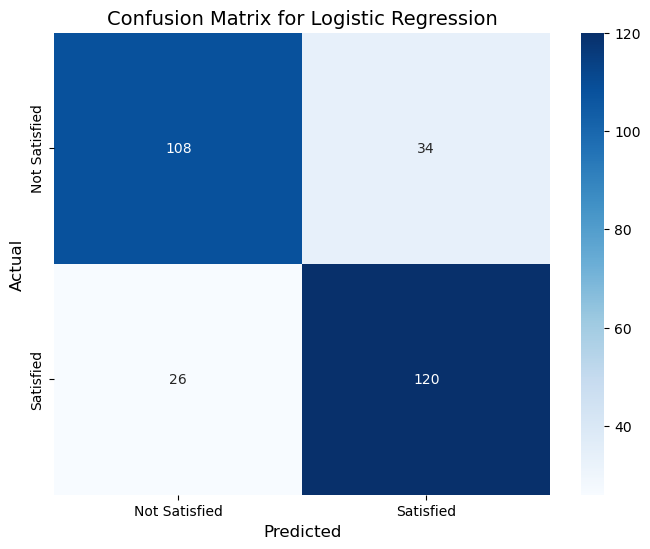

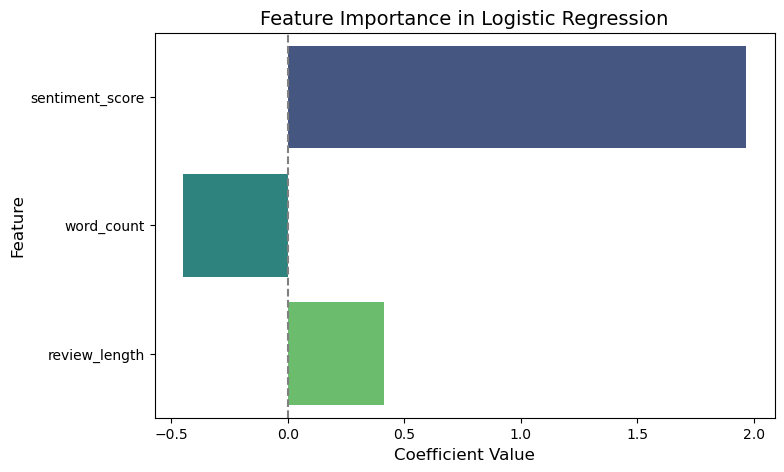

In [33]:
# Train the logistic regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cv_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=5)
print(f"Test Set Accuracy: {accuracy:.3f}")
print(f"Cross-Validation Scores: {cv_scores.mean():.3f} (±{cv_scores.std() * 2:.3f})")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Satisfied', 'Satisfied'], yticklabels=['Not Satisfied', 'Satisfied'])
plt.title('Confusion Matrix for Logistic Regression', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

# Feature Importance (Coefficients)
feature_importance = pd.DataFrame({'Feature': features, 'Coefficient': log_reg.coef_[0]})
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values('Absolute Coefficient', ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(data=feature_importance, x='Coefficient', y='Feature', palette='viridis')
plt.title('Feature Importance in Logistic Regression', fontsize=14)
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.axvline(x=0, color='gray', linestyle='--')
plt.show()

### **XGBoost Classifier**

Test Set Accuracy: 0.733
Cross-Validation Scores: 0.747 (±0.045)

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.70      0.72       142
           1       0.73      0.76      0.74       146

    accuracy                           0.73       288
   macro avg       0.73      0.73      0.73       288
weighted avg       0.73      0.73      0.73       288



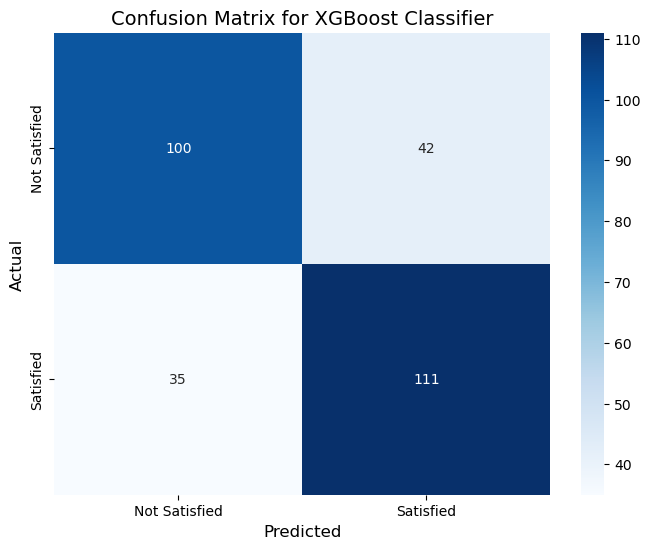

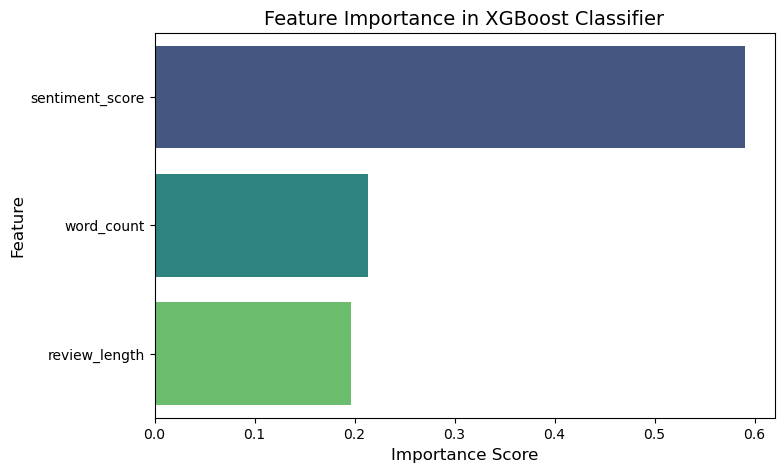

In [34]:
import xgboost as xgb

# Train the XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=(len(y_train[y_train == 0]) / len(y_train[y_train == 1]))  # Handle imbalance
)
xgb_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cv_scores = cross_val_score(xgb_model, X_train_scaled, y_train, cv=5)
print(f"Test Set Accuracy: {accuracy:.3f}")
print(f"Cross-Validation Scores: {cv_scores.mean():.3f} (±{cv_scores.std() * 2:.3f})")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Satisfied', 'Satisfied'], yticklabels=['Not Satisfied', 'Satisfied'])
plt.title('Confusion Matrix for XGBoost Classifier', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

# Feature Importance (XGBoost Feature Importance)
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': xgb_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance in XGBoost Classifier', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()


### **Random Forest Classifier**

Test Set Accuracy: 0.510
Cross-Validation Scores: 0.478 (±0.027)

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.51      0.51       142
           1       0.52      0.51      0.51       146

    accuracy                           0.51       288
   macro avg       0.51      0.51      0.51       288
weighted avg       0.51      0.51      0.51       288



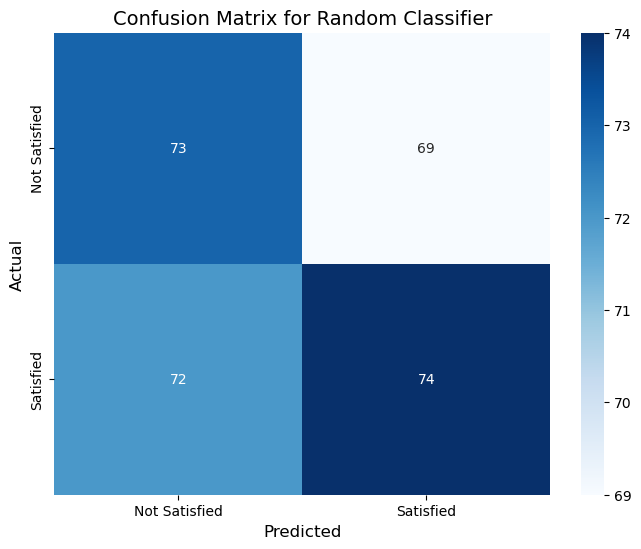

Note: Random Classifier does not provide feature importance as it makes random predictions.


In [35]:
from sklearn.dummy import DummyClassifier

# Train the Random Classifier (Dummy Classifier with uniform strategy)
dummy_model = DummyClassifier(strategy='uniform', random_state=42)
dummy_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = dummy_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cv_scores = cross_val_score(dummy_model, X_train_scaled, y_train, cv=5)
print(f"Test Set Accuracy: {accuracy:.3f}")
print(f"Cross-Validation Scores: {cv_scores.mean():.3f} (±{cv_scores.std() * 2:.3f})")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Satisfied', 'Satisfied'], yticklabels=['Not Satisfied', 'Satisfied'])
plt.title('Confusion Matrix for Random Classifier', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

# Feature Importance (Not applicable for Random Classifier, using placeholder)
print("Note: Random Classifier does not provide feature importance as it makes random predictions.")

### **Naive Bayes**

Test Set Accuracy: 0.785
Cross-Validation Scores: 0.764 (±0.014)

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.73      0.77       142
           1       0.76      0.84      0.80       146

    accuracy                           0.78       288
   macro avg       0.79      0.78      0.78       288
weighted avg       0.79      0.78      0.78       288



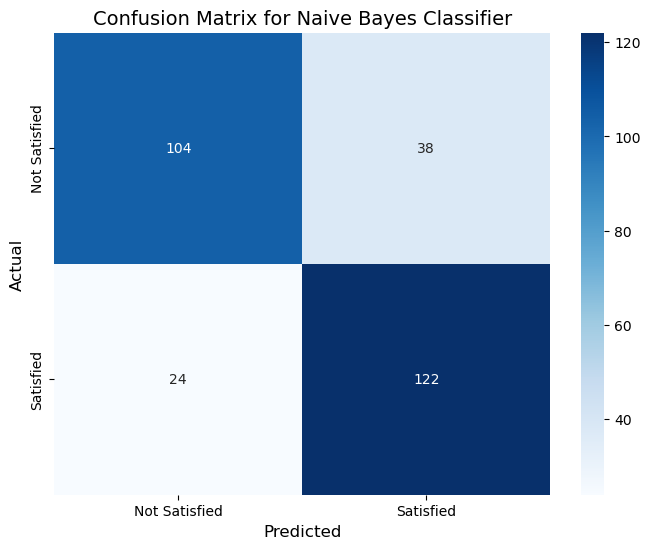

Note: Naive Bayes does not provide feature importance directly as it assumes feature independence.


In [36]:
from sklearn.naive_bayes import GaussianNB

# Train the Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = nb_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cv_scores = cross_val_score(nb_model, X_train_scaled, y_train, cv=5)
print(f"Test Set Accuracy: {accuracy:.3f}")
print(f"Cross-Validation Scores: {cv_scores.mean():.3f} (±{cv_scores.std() * 2:.3f})")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Satisfied', 'Satisfied'], yticklabels=['Not Satisfied', 'Satisfied'])
plt.title('Confusion Matrix for Naive Bayes Classifier', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

# Feature Importance (Not directly available for Naive Bayes, using placeholder)
print("Note: Naive Bayes does not provide feature importance directly as it assumes feature independence.")


### **SVM (Support Vector Machine)**

Test Set Accuracy: 0.812
Cross-Validation Scores: 0.759 (±0.036)

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.77      0.80       142
           1       0.79      0.86      0.82       146

    accuracy                           0.81       288
   macro avg       0.81      0.81      0.81       288
weighted avg       0.81      0.81      0.81       288



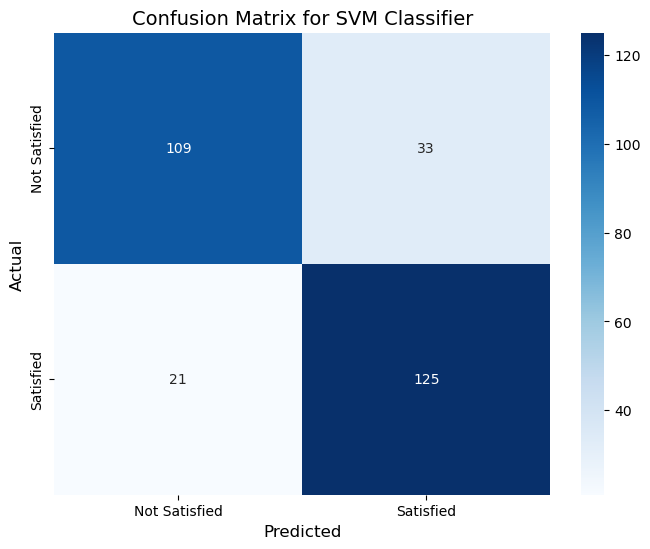

Note: SVM does not provide direct feature importance with RBF kernel.


In [37]:
from sklearn.svm import SVC

# Train the SVM Classifier
svm_model = SVC(kernel='rbf', random_state=42, probability=True)
svm_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5)
print(f"Test Set Accuracy: {accuracy:.3f}")
print(f"Cross-Validation Scores: {cv_scores.mean():.3f} (±{cv_scores.std() * 2:.3f})")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Satisfied', 'Satisfied'], yticklabels=['Not Satisfied', 'Satisfied'])
plt.title('Confusion Matrix for SVM Classifier', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

# Feature Importance (Not directly available for SVM, using placeholder)
print("Note: SVM does not provide direct feature importance with RBF kernel.")


### **KNN (K-Nearest Neighbors)**

Test Set Accuracy: 0.767
Cross-Validation Scores: 0.753 (±0.035)

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76       142
           1       0.76      0.79      0.78       146

    accuracy                           0.77       288
   macro avg       0.77      0.77      0.77       288
weighted avg       0.77      0.77      0.77       288



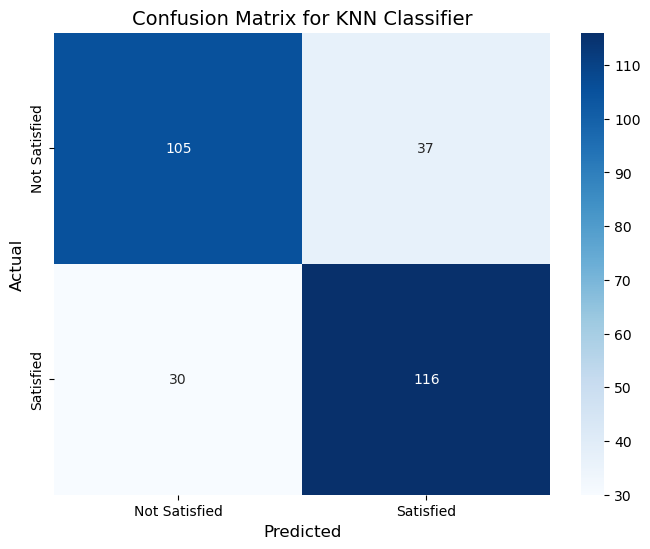

In [38]:
from sklearn.neighbors import KNeighborsClassifier


# Train the KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = knn_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cv_scores = cross_val_score(knn_model, X_train_scaled, y_train, cv=5)
print(f"Test Set Accuracy: {accuracy:.3f}")
print(f"Cross-Validation Scores: {cv_scores.mean():.3f} (±{cv_scores.std() * 2:.3f})")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Satisfied', 'Satisfied'], yticklabels=['Not Satisfied', 'Satisfied'])
plt.title('Confusion Matrix for KNN Classifier', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

## **Model Evaluation Chart**

This chart visually compares the performance of different classification models using:

- Test Set Accuracy: How well the model performs on unseen data.

- Cross-Validation (CV) Mean Score: How consistently the model performs across multiple data splits.

In [39]:
# Dictionary to store model results
model_results = {}

# Random Classifier
dummy_model = DummyClassifier(strategy='uniform', random_state=42)
dummy_model.fit(X_train_scaled, y_train)
y_pred_dummy = dummy_model.predict(X_test_scaled)
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
cv_scores_dummy = cross_val_score(dummy_model, X_train_scaled, y_train, cv=5)
model_results['Random'] = {'Accuracy': accuracy_dummy, 'CV Mean': cv_scores_dummy.mean()}

# Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
y_pred_nb = nb_model.predict(X_test_scaled)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
cv_scores_nb = cross_val_score(nb_model, X_train_scaled, y_train, cv=5)
model_results['Naive Bayes'] = {'Accuracy': accuracy_nb, 'CV Mean': cv_scores_nb.mean()}

# SVM Classifier
svm_model = SVC(kernel='rbf', random_state=42, probability=True)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
cv_scores_svm = cross_val_score(svm_model, X_train_scaled, y_train, cv=5)
model_results['SVM'] = {'Accuracy': accuracy_svm, 'CV Mean': cv_scores_svm.mean()}

# KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
cv_scores_knn = cross_val_score(knn_model, X_train_scaled, y_train, cv=5)
model_results['KNN'] = {'Accuracy': accuracy_knn, 'CV Mean': cv_scores_knn.mean()}

# XGBoost Classifier
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', scale_pos_weight=(len(y_train[y_train == 0]) / len(y_train[y_train == 1])))
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
cv_scores_xgb = cross_val_score(xgb_model, X_train_scaled, y_train, cv=5)
model_results['XGBoost'] = {'Accuracy': accuracy_xgb, 'CV Mean': cv_scores_xgb.mean()}

# Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)
accuracy_log = accuracy_score(y_test, y_pred_log)
cv_scores_log = cross_val_score(log_reg, X_train_scaled, y_train, cv=5)
model_results['Logistic Regression'] = {'Accuracy': accuracy_log, 'CV Mean': cv_scores_log.mean()}

# Print results
for model, results in model_results.items():
    print(f"{model} - Test Accuracy: {results['Accuracy']:.3f}, CV Mean: {results['CV Mean']:.3f}")

# Evaluation Chart: Bar Chart for Accuracy and CV Mean
chart_data = {
    'type': 'bar',
    'data': {
        'labels': list(model_results.keys()),
        'datasets': [
            {
                'label': 'Test Set Accuracy',
                'data': [results['Accuracy'] for results in model_results.values()],
                'backgroundColor': '#FF6B6B',  # Red for Accuracy
                'borderColor': '#FFFFFF',
                'borderWidth': 1
            },
            {
                'label': 'CV Mean Score',
                'data': [results['CV Mean'] for results in model_results.values()],
                'backgroundColor': '#4ECDC4',  # Teal for CV Mean
                'borderColor': '#FFFFFF',
                'borderWidth': 1
            }
        ]
    },
    'options': {
        'responsive': True,
        'maintainAspectRatio': False,
        'title': {
            'display': True,
            'text': 'Model Performance Comparison',
            'fontSize': 16
        },
        'scales': {
            'yAxes': [{
                'ticks': {
                    'beginAtZero': True,
                    'max': 1.0
                },
                'scaleLabel': {
                    'display': True,
                    'labelString': 'Score'
                }
            }]
        },
        'legend': {
            'position': 'bottom'
        }
    }
}

Random - Test Accuracy: 0.510, CV Mean: 0.478
Naive Bayes - Test Accuracy: 0.785, CV Mean: 0.764
SVM - Test Accuracy: 0.812, CV Mean: 0.759
KNN - Test Accuracy: 0.767, CV Mean: 0.753
XGBoost - Test Accuracy: 0.733, CV Mean: 0.747
Logistic Regression - Test Accuracy: 0.792, CV Mean: 0.776


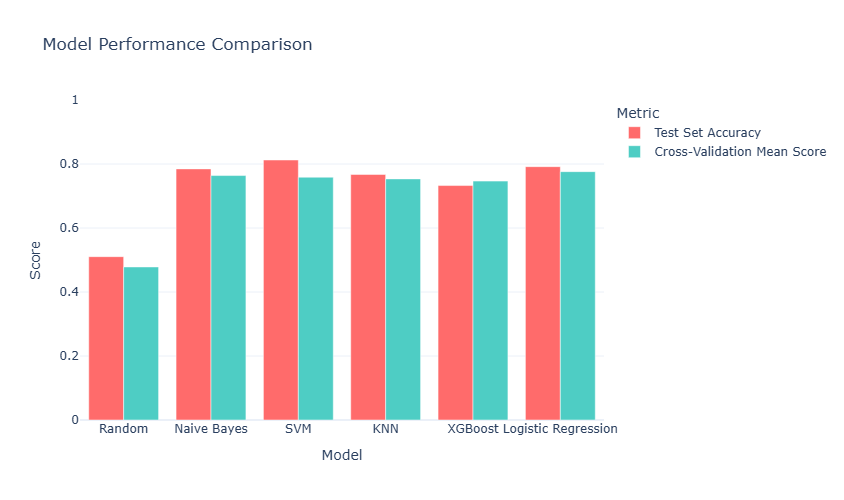

In [40]:
import plotly.graph_objects as go

# Prepare data for plotting
model_names = list(model_results.keys())
accuracy_scores = [results['Accuracy'] for results in model_results.values()]
cv_means = [results['CV Mean'] for results in model_results.values()]

# Create grouped bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    x=model_names,
    y=accuracy_scores,
    name='Test Set Accuracy',
    marker_color='#FF6B6B'
))

fig.add_trace(go.Bar(
    x=model_names,
    y=cv_means,
    name='Cross-Validation Mean Score',
    marker_color='#4ECDC4'
))

# Update layout
fig.update_layout(
    title=' Model Performance Comparison',
    xaxis_title='Model',
    yaxis_title='Score',
    barmode='group',
    legend_title='Metric',
    yaxis=dict(range=[0, 1.0]),
    template='plotly_white',
    height=500,
    width=850
)

fig.show()


### Interpretation of Model Comparison Chart

This chart compares six classification models based on two metrics: **Test Set Accuracy** and **Cross-Validation (CV) Mean Score**. These metrics help evaluate how well a model performs on unseen data and how stable it is across different data splits.

####  Key Observations:

- **Support Vector Machine (SVM)** achieved the **highest test accuracy (81.2%)**, making it the best performer on unseen data.
- However, **Logistic Regression** showed the **highest CV mean score (77.6%)**, meaning it performs more consistently across different subsets of the training data.
- Both **SVM** and **Logistic Regression** are strong candidates — **SVM** is slightly better on the test set, while **Logistic Regression** is more stable.
- **Random Classifier** performs close to random chance (51% accuracy), indicating it's only useful as a baseline.
- **Naive Bayes**, **KNN**, and **XGBoost** perform reasonably but do not outperform SVM or Logistic Regression.

#### Final Recommendation:

Considering both **accuracy** and **consistency**, **Logistic Regression** is the most balanced and reliable model for this classification task.  
However, **SVM** can be preferred if **maximum predictive performance** is the priority and generalization risk is acceptable.



## **Deployment**

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train Logistic Regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[108  34]
 [ 26 120]]
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       142
           1       0.78      0.82      0.80       146

    accuracy                           0.79       288
   macro avg       0.79      0.79      0.79       288
weighted avg       0.79      0.79      0.79       288



In [42]:
import pandas as pd
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from textblob import TextBlob

# Load your dataset
df = pd.read_csv("Dataset.csv")

# Generate sentiment labels (1 = Positive, 0 = Negative)
df['sentiment_score'] = df['body'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['sentiment_label'] = df['sentiment_score'].apply(lambda x: 1 if x > 0.1 else 0)

# Prepare features and labels
X = df['body']
y = df['sentiment_label']

# Vectorize text
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_vec = vectorizer.fit_transform(X)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_vec, y)

# Save model and vectorizer
joblib.dump(model, 'sentiment_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

print("✅ Model and vectorizer saved successfully.")


✅ Model and vectorizer saved successfully.
